In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/cardekho.csv


# Loading DataSet

In [4]:
df = pd.read_csv('/kaggle/input/car-price-prediction-dataset/cardekho.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6718 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6721 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 703.4+ KB


In [7]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
engine                208
max_power             205
seats                 208
dtype: int64

# Feature Transformation

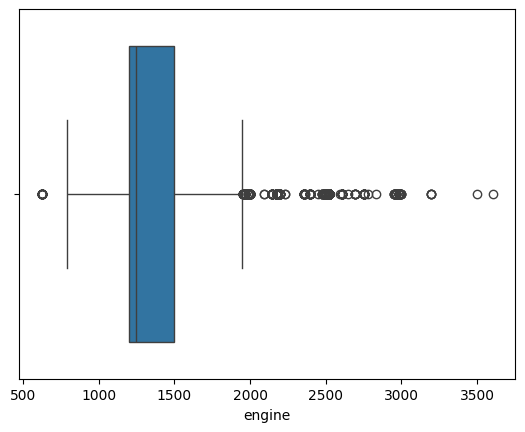

Mean: 1430.8913367073533
Median: 1248.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for outliers
sns.boxplot(x=df['engine'])
plt.show()

# Check if the data is skewed
print(f"Mean: {df['engine'].mean()}")
print(f"Median: {df['engine'].median()}")

There are outliers in our data and we need to tackel them.

<Axes: xlabel='engine', ylabel='Count'>

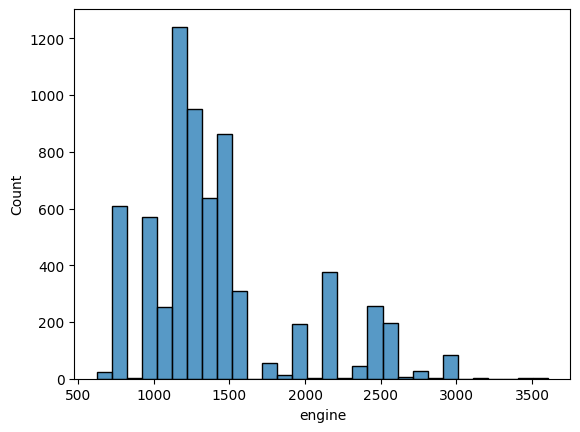

In [9]:
sns.histplot(df['engine'].dropna(), bins=30)

The data is Right Skewed and there are outliers present

To deal with outliers we will take log of the engine values

In [10]:
df['engine_log'] = np.log(df['engine'])
df = df.drop(columns = ['engine'])

<Axes: xlabel='engine_log', ylabel='Count'>

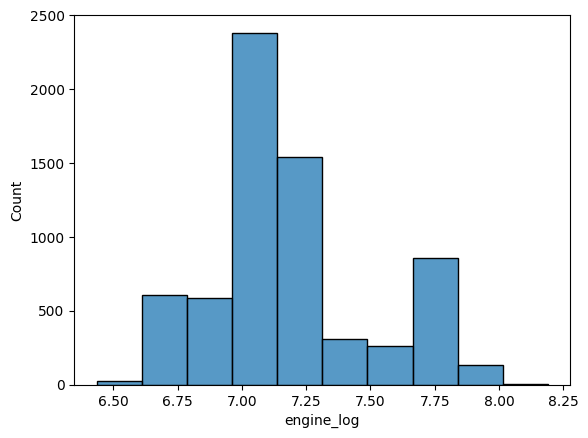

In [11]:
sns.histplot(df['engine_log'].dropna(), bins=10)

<Axes: xlabel='engine_log', ylabel='Count'>

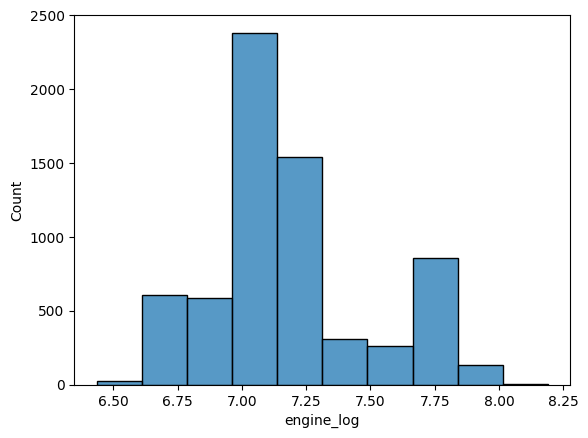

In [12]:
sns.histplot(df['engine_log'].dropna(), bins=10)

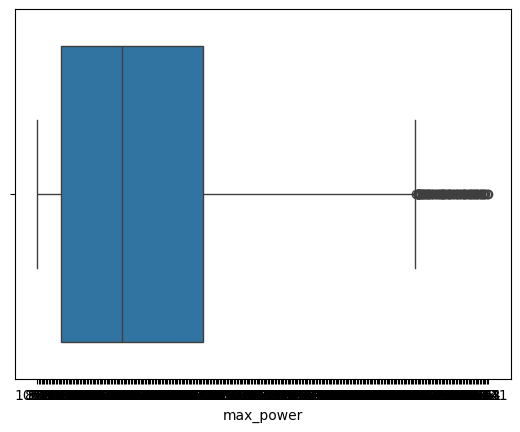

In [13]:
# Check for outliers in max_power
sns.boxplot(x=df['max_power'])
plt.show()

There is a thick line of outliers.

<Axes: xlabel='max_power', ylabel='Count'>

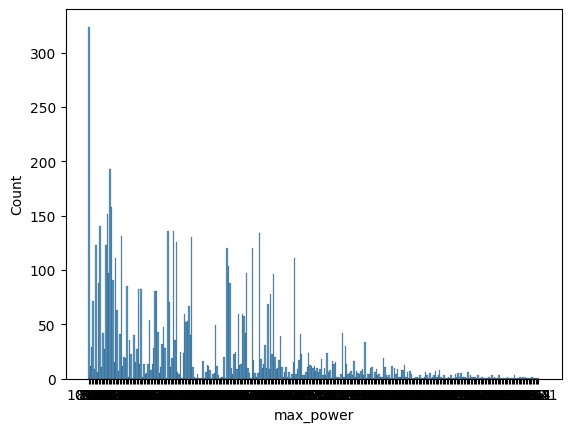

In [14]:
sns.histplot(df['max_power'].dropna(), bins=5)

The data is heavily right skewed

In [15]:
df['max_power'] = df['max_power'].replace(0, np.nan) 
# Replacing the 0 value with nan as this can cause error while taking log
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Replacing the infinite value with NaN
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power_log'] = np.log1p(df['max_power'])

<Axes: xlabel='max_power', ylabel='Count'>

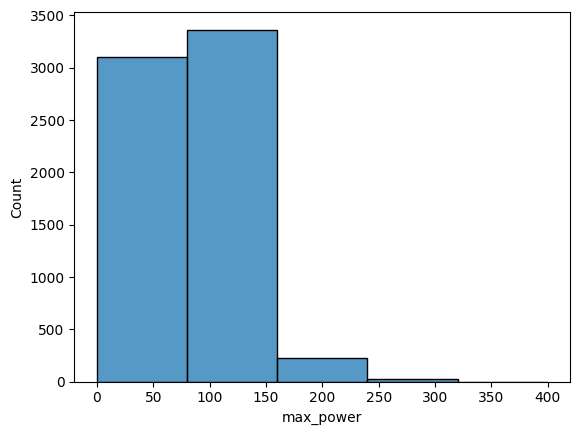

In [16]:
sns.histplot(df['max_power'].dropna(), bins=5)

No our data looks more manageable

# Handling Missing Values

In [17]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    208
max_power             206
seats                 208
engine_log            208
max_power_log         206
dtype: int64

In [18]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),max_power,seats,engine_log,max_power_log
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6720.000000,6718.000000,6718.000000,6720.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,87.726919,5.434653,7.213688,4.429033
std,4.078286,5.197670e+05,5.835810e+04,4.04915,31.771619,0.984230,0.316339,0.338830
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,0.000000,2.000000,6.436150,0.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,67.100000,5.000000,7.087574,4.220977
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,81.830000,5.000000,7.129298,4.416790
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,100.000000,5.000000,7.311886,4.615121
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,400.000000,14.000000,8.189800,5.993961


There is 0 mileage which is not possile

In [19]:
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].replace(0, np.nan)

In [20]:
from sklearn.impute import SimpleImputer

engine_log_median = SimpleImputer(strategy = 'median')
df[['engine_log']] = engine_log_median.fit_transform(df[['engine_log']])

max_power_log = SimpleImputer(strategy = 'median')
df[['max_power_log']] = engine_log_median.fit_transform(df[['max_power_log']])

mileage_imputer = SimpleImputer(strategy='median')
df[['mileage(km/ltr/kg)']] = mileage_imputer.fit_transform(df[['mileage(km/ltr/kg)']])

seats_imputer = SimpleImputer(strategy='mean')
df[['seats']] = seats_imputer.fit_transform(df[['seats']])

df = df.drop(columns = ['max_power'])

In [21]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
seats                 0
engine_log            0
max_power_log         0
dtype: int64

In [22]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),seats,engine_log,max_power_log
count,6926.000000,6.926000e+03,6.926000e+03,6926.000000,6926.000000,6926.000000,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.508262,5.434653,7.211154,4.428669
std,4.078286,5.197670e+05,5.835810e+04,3.883376,0.969336,0.311884,0.333759
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,2.000000,6.436150,0.000000
25%,2011.000000,2.500000e+05,4.000000e+04,17.000000,5.000000,7.087574,4.234107
50%,2014.000000,4.000000e+05,7.000000e+04,19.490000,5.000000,7.129298,4.416790
75%,2017.000000,6.335000e+05,1.000000e+05,22.320000,5.000000,7.311886,4.605170
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,14.000000,8.189800,5.993961


In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),seats,engine_log,max_power_log
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,7.129298,4.317488
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,7.311886,4.649378
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,7.311218,4.369448
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,7.241366,4.510860
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,7.168580,4.490881


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   seats               6926 non-null   float64
 10  engine_log          6926 non-null   float64
 11  max_power_log       6926 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


# EDA => Exploraitory Data Analysis

In [25]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),seats,engine_log,max_power_log
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,5.0,7.129298,4.317488
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,5.0,7.311886,4.649378
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,5.0,7.311218,4.369448
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,5.0,7.241366,4.510860
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,5.0,7.168580,4.490881


### CAR YEAR

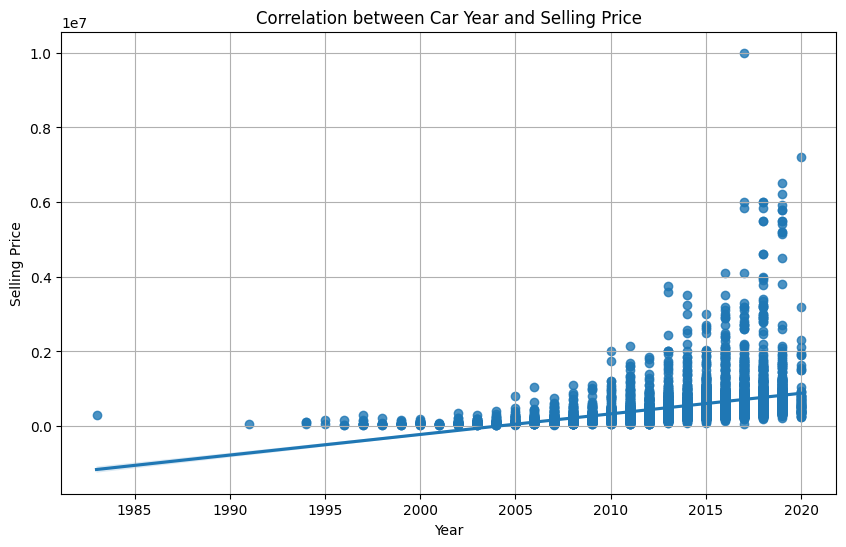

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='selling_price', data=df)

plt.title('Correlation between Car Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)

There is a positive correlation between the year and selling price

### KM DRIVEN

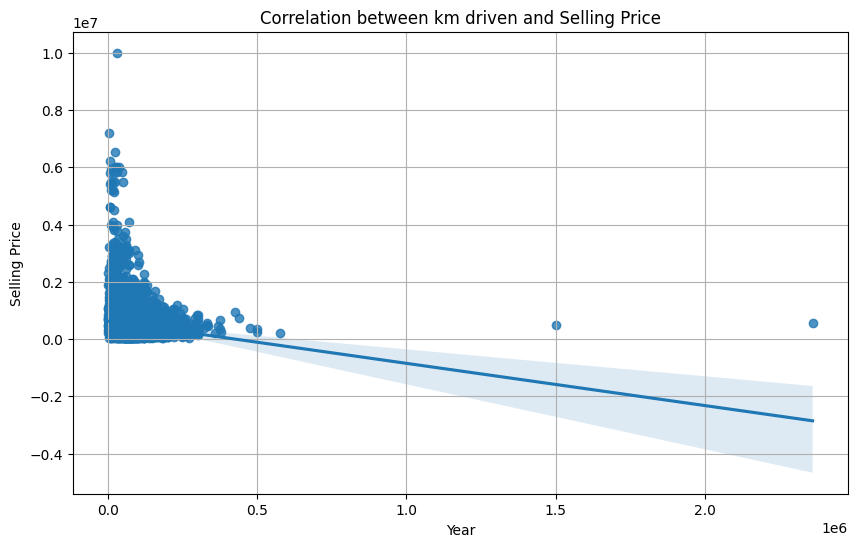

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x='km_driven', y='selling_price', data=df)

plt.title('Correlation between km driven and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)

There is a strong correlation and from the graph we can spot a feww outliers which will try to pull our linear regression model towards themselves, so it's better to handel them now

In [28]:
mean_km = df['km_driven'].mean()
std_km = df['km_driven'].std()

limit_value = mean_km + (1.5 * std_km)

print(limit_value)

161532.81919963798


In [29]:
print(df[df['km_driven'] > limit_value].shape)

(309, 12)


In [30]:
df = df[df['km_driven'] <= limit_value]

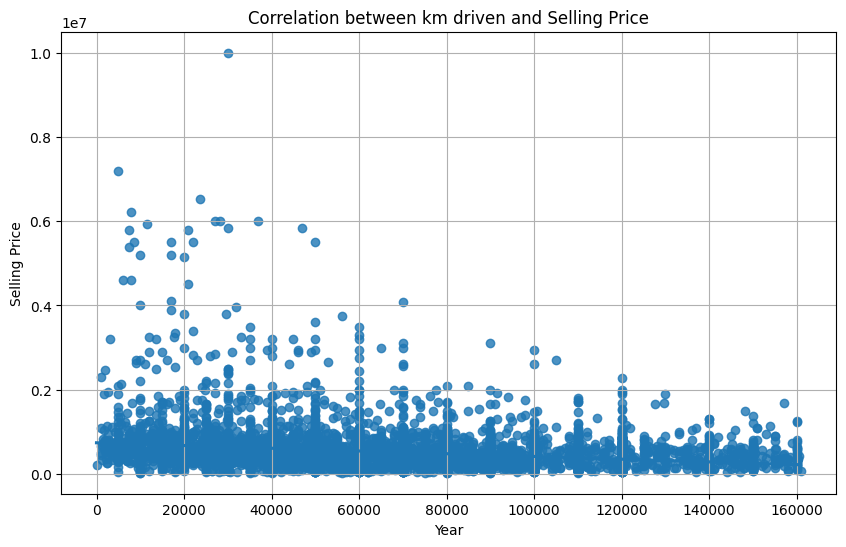

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='km_driven', y='selling_price', data=df)

plt.title('Correlation between km driven and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)

The outliers have been removed succesfully

### MILEAGE

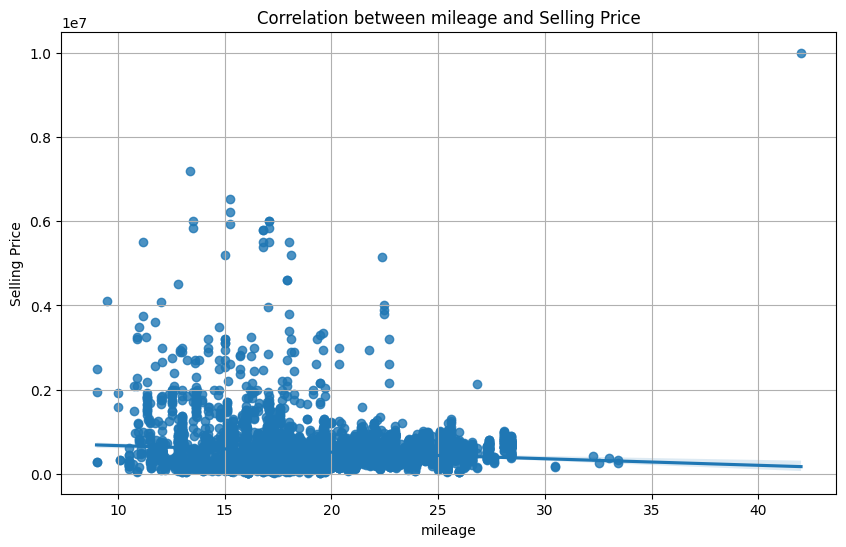

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='mileage(km/ltr/kg)', y='selling_price', data=df)

plt.title('Correlation between mileage and Selling Price')
plt.xlabel('mileage')
plt.ylabel('Selling Price')
plt.grid(True)

The Straight line shows that there is no correlation between mileage in selling price and there are super outliers which needs to be handeled

In [33]:
# Check cars with mileage greater than 35 kmpl
print(df[df['mileage(km/ltr/kg)'] > 35])

                              name  year  selling_price  km_driven    fuel  \
170  Volvo XC90 T8 Excellence BSIV  2017       10000000      30000  Petrol   

    seller_type transmission        owner  mileage(km/ltr/kg)  seats  \
170  Individual    Automatic  First Owner                42.0    4.0   

     engine_log  max_power_log  
170    7.585281       5.993961  


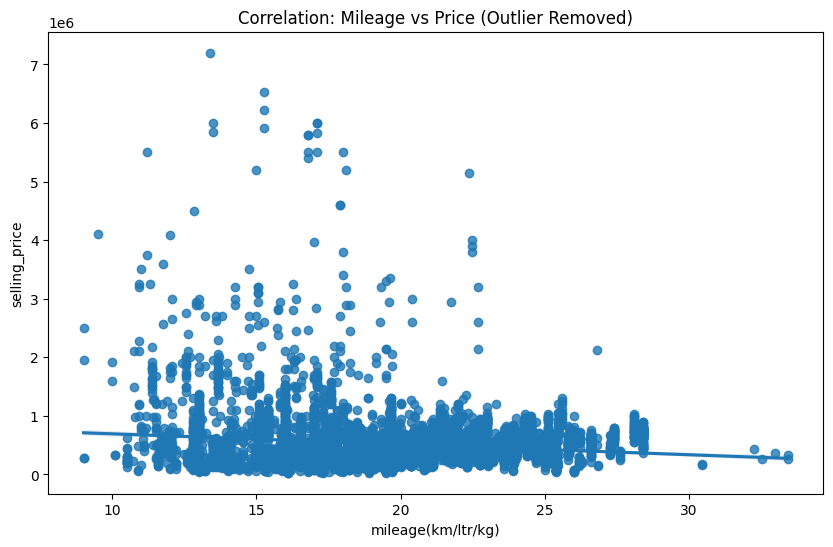

In [34]:
df_clean = df[df['mileage(km/ltr/kg)'] < 35]
df = df_clean.copy()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x='mileage(km/ltr/kg)', y='selling_price', data=df)
plt.title('Correlation: Mileage vs Price (Outlier Removed)')
plt.show()

In [35]:
print(df.corr(numeric_only=True)['selling_price'])

year                  0.439752
selling_price         1.000000
km_driven            -0.229477
mileage(km/ltr/kg)   -0.132755
seats                 0.174119
engine_log            0.467934
max_power_log         0.593196
Name: selling_price, dtype: float64


### FUEL

Text(0.5, 1.0, 'Market Share of Different Fuel Types')

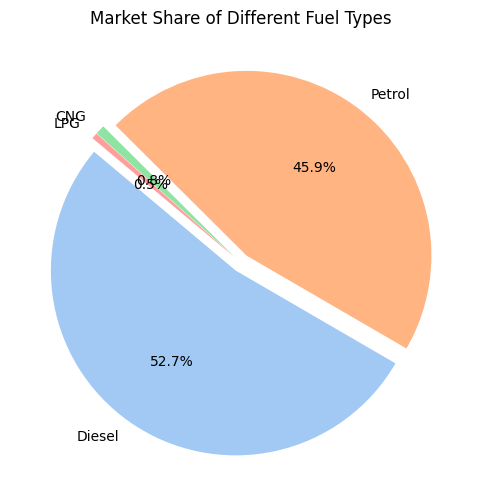

In [36]:
fuel_counts = df['fuel'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(fuel_counts, 
        labels=fuel_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'),
        explode=[0.05] * len(fuel_counts)) 

plt.title('Market Share of Different Fuel Types')

<Axes: xlabel='selling_price', ylabel='fuel'>

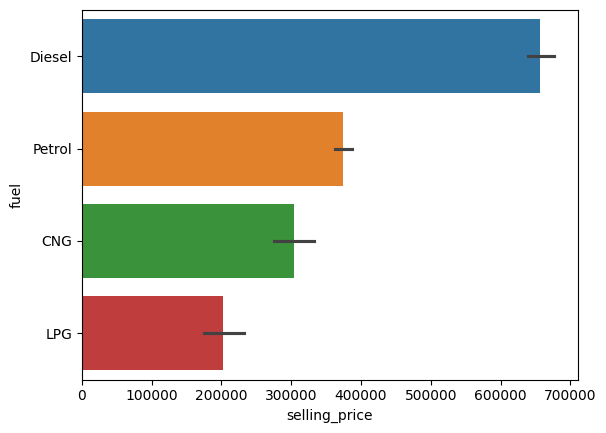

In [37]:
sns.barplot(data = df, x ='selling_price', y='fuel', hue='fuel')

As from both of the graphs above we can clearly see that *LPG* and *CNG* are very less in number and have similar pricing as well.

So we will do **One Hot Encoding** but we will replace *CNG* & *LPG* with *other*

# TRANSMISSION

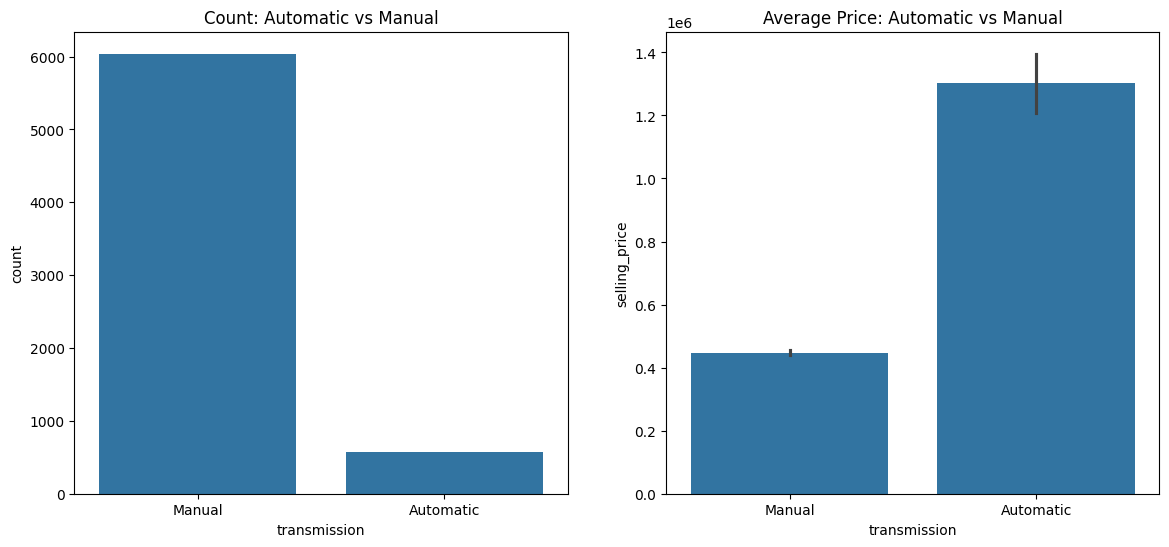

In [38]:
plt.figure(figsize=(14, 6))

# Plot 1: Count (How many Automatic vs Manual?)
plt.subplot(1, 2, 1)
sns.countplot(x='transmission', data=df)
plt.title('Count: Automatic vs Manual')

# Plot 2: Price (Who is more expensive?)
plt.subplot(1, 2, 2)
sns.barplot(x='transmission', y='selling_price', data=df)
plt.title('Average Price: Automatic vs Manual')

plt.show()

We will LabelEncode them {Automatic:1, Manual:0}

### OWNER

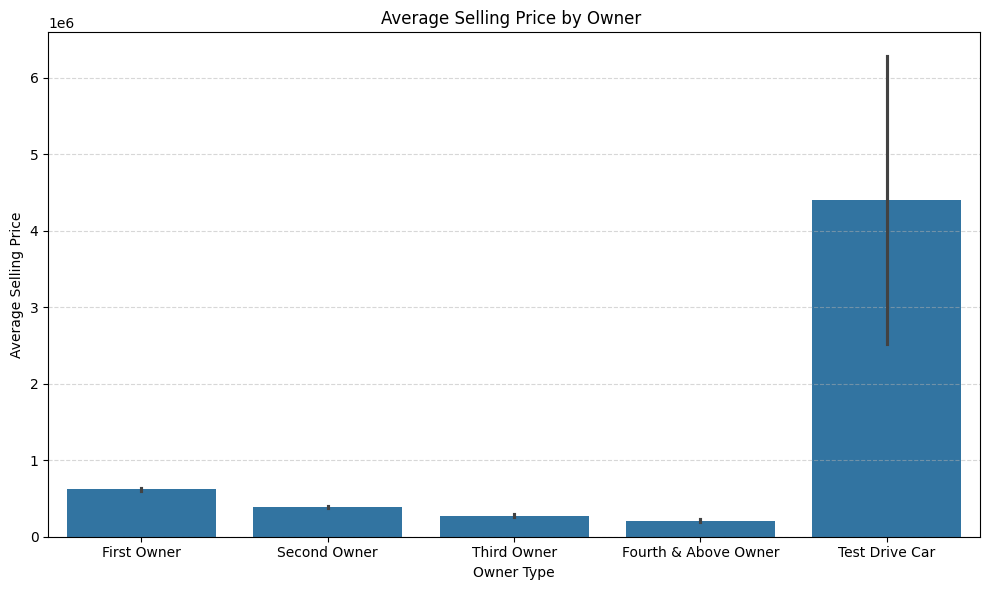

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(x='owner', y='selling_price', data=df)
plt.title('Average Selling Price by Owner ')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Will do OneHotEncoding and combine Third owner type and forth & above owner

In [40]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),seats,engine_log,max_power_log
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,5.0,7.129298,4.317488


### SELLER TYPE

In [41]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

Text(0.5, 1.0, 'Market Share of Different Seller Type')

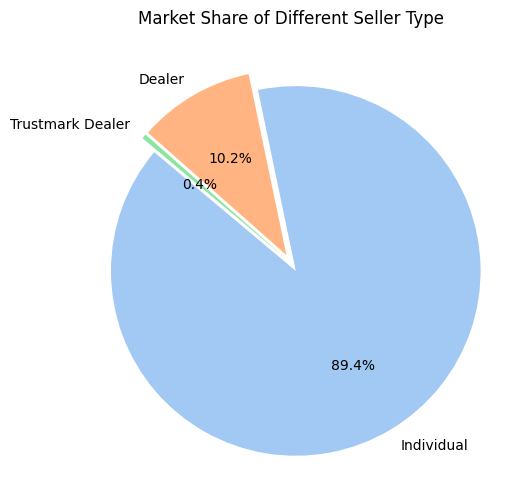

In [42]:
seller_type_counts = df['seller_type'].value_counts()

plt.figure(figsize=(6, 6))

plt.pie(seller_type_counts, 
        labels=seller_type_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'),
        explode=[0.05] * len(seller_type_counts)) 

plt.title('Market Share of Different Seller Type')

<Axes: xlabel='selling_price', ylabel='seller_type'>

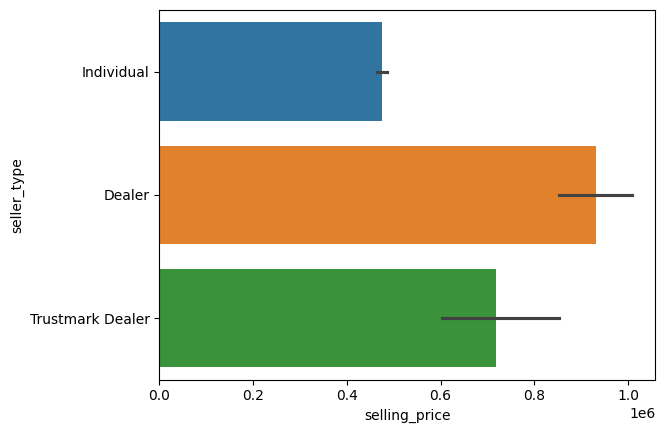

In [43]:
sns.barplot(data=df, y='seller_type', x='selling_price', hue='seller_type')

Text(0, 0.5, 'Seller Type')

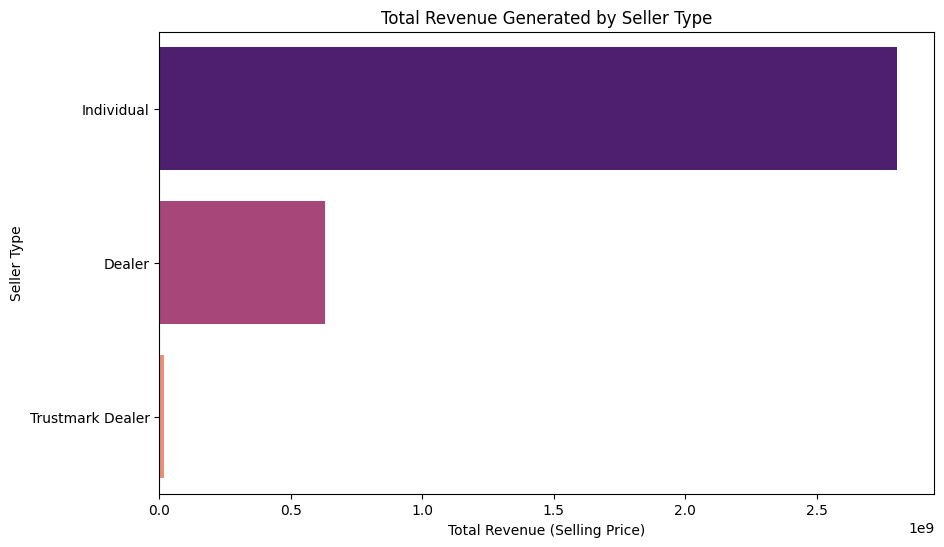

In [44]:
revenue_by_seller = df.groupby('seller_type')['selling_price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

sns.barplot(x=revenue_by_seller.values, 
            y=revenue_by_seller.index, 
            palette='magma',
           hue=revenue_by_seller.index,)

plt.title('Total Revenue Generated by Seller Type')
plt.xlabel('Total Revenue (Selling Price)')
plt.ylabel('Seller Type')

From the second graph we can see that dealer and trust mark dealer sell car more expensive than the individual, but still the individual have high revenue because they are more in number almost 90%

And the market share for trust mark dealer is just 0.4% and it's not enough for our model to learn anything.

So we will just combine trust mark dealer and dealer as commercial seller.

The reason why commercial seller are abole to sell car more expensive but still there is a huge majority of people who prfer individual sharing is most certainly due to the fact the commercial seller also have theri cut in a car which eventually make the car expensive but the person gets less money.

I'll one hot encode them .

In [45]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),seats,engine_log,max_power_log
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,5.0,7.129298,4.317488


### ENGINE_LOG

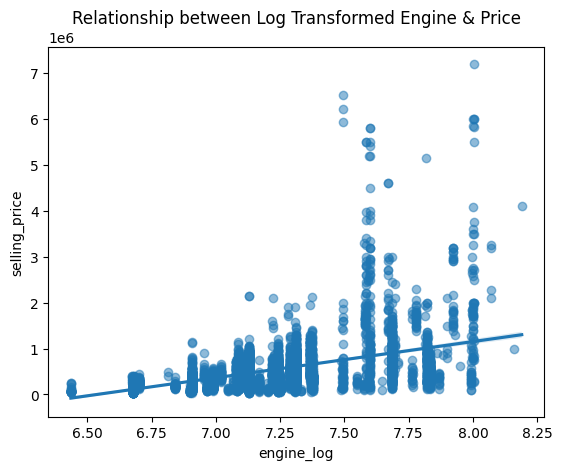

In [46]:
sns.regplot(data=df, x='engine_log', y='selling_price', scatter_kws={'alpha':0.5})

plt.title('Relationship between Log Transformed Engine & Price')
plt.show()

We can see some outliers due to the brand effect

### MAX_POWER_LOG

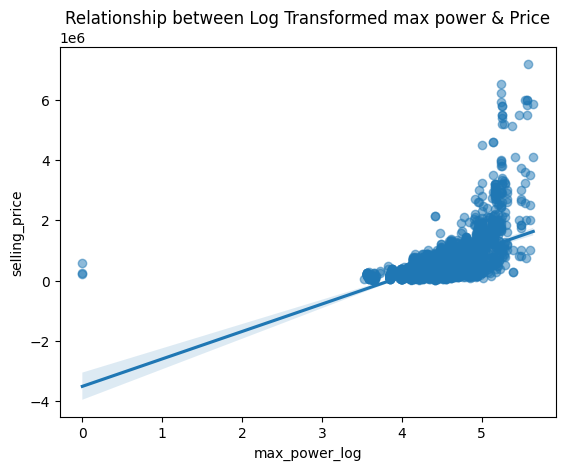

In [47]:
sns.regplot(data=df, x='max_power_log', y='selling_price', scatter_kws={'alpha':0.5})

plt.title('Relationship between Log Transformed max power & Price')
plt.show()

### SEATS

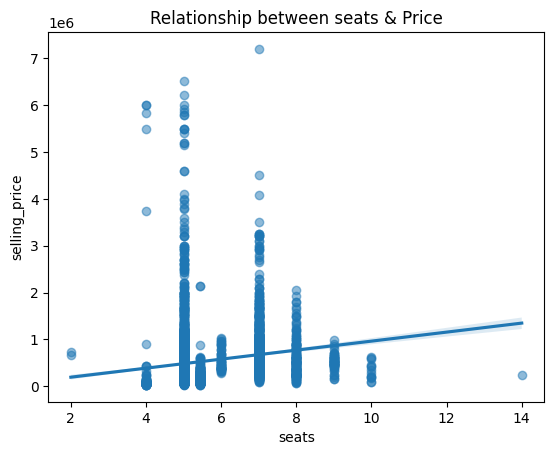

In [48]:
sns.regplot(data=df, x='seats', y='selling_price', scatter_kws={'alpha':0.5})

plt.title('Relationship between seats & Price')
plt.show()

We can see some outliers due to the brand effect

### BRAND

In [49]:
# Car Brands
df['brand'] = df['name'].str.split().str[0]

In [50]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Ford', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

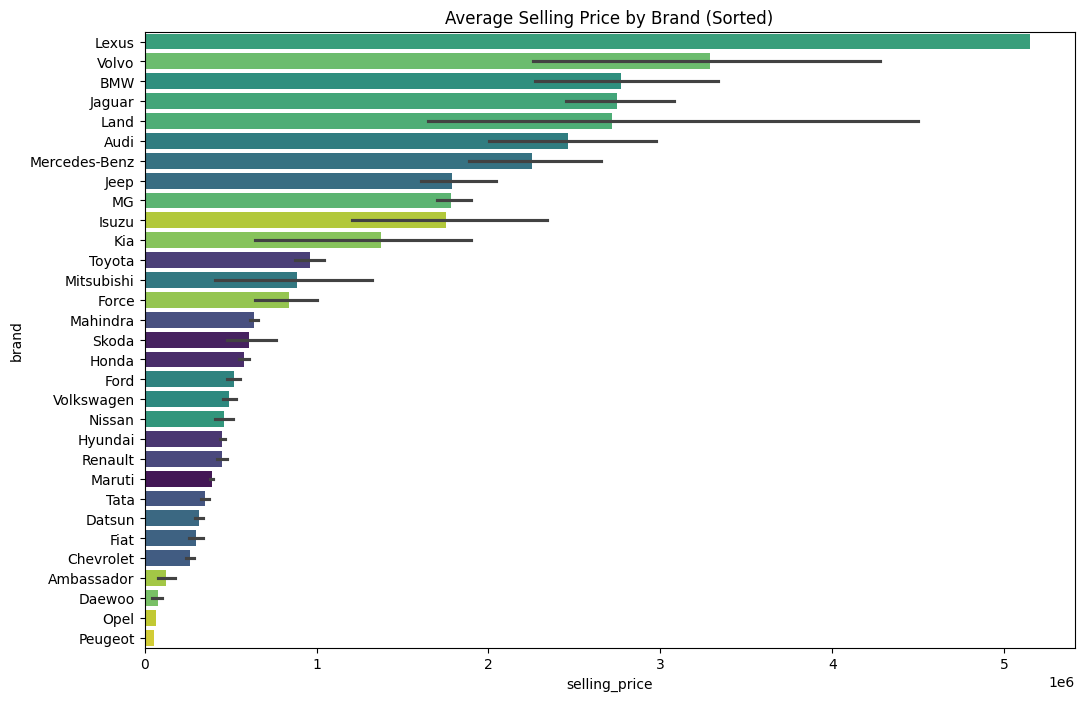

In [51]:
plt.figure(figsize=(12, 8))

# Calculate the order from most expensive to least expensive
order_by_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).index

sns.barplot(
    data=df, 
    x='selling_price', 
    y='brand', 
    order=order_by_price,     # Sorts the bars
    palette='viridis',        # Applies the color gradient
    hue='brand',              # Required to suppress warnings
    legend=False
)

plt.title('Average Selling Price by Brand (Sorted)')
plt.show()

### 📊 Brand Analysis Summary

**1. Distinct Price Segmentation**
Our analysis reveals a clear tiered structure in the Indian used car market based on brand value:
* **Super Luxury Tier:** Brands like **Lexus, Volvo, BMW, Jaguar, Land Rover, and Audi** are significant outliers, commanding the highest average prices.
* **Premium Tier:** Brands like **Toyota, Jeep, MG, and Isuzu** sit in the middle—significantly more expensive than mass-market options but below the German luxury trio.
* **Budget / Mass Market:** The vast majority of the dataset (Maruti, Hyundai, Tata, Datsun) is clustered at the lower end with very similar average prices.

**2. Explaining the "Engine vs. Price" Anomaly**
This insight resolves the earlier scatter plot anomalies where cars with similar engine sizes had vastly different prices. The "Brand Premium" explains why a 2.0L engine in a **BMW** costs 4x more than a 2.0L engine in a **Tata**.

**3. Feature Engineering Decision**
To help our Linear Regression model capture this without overfitting to 30+ individual brand columns, we will engineer a new binary feature:
* **`is_luxury`**: A flag (0 or 1) that groups the top-tier and premium brands together. This allows the model to distinguish between "Economy" and "Premium" pricing logic efficiently.

In [52]:
print(df.corr(numeric_only=True)['selling_price'])

year                  0.439752
selling_price         1.000000
km_driven            -0.229477
mileage(km/ltr/kg)   -0.132755
seats                 0.174119
engine_log            0.467934
max_power_log         0.593196
Name: selling_price, dtype: float64


# Feature Encoding

In [53]:
# One Hot Encoding on fuel
# combining lpg & cng in alternative before OHE

df['fuel'] = df['fuel'].replace(['CNG', 'LPG'], 'Alternative')
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)

In [54]:
# One Hot Encoding seller_type
# But first combining dealer and trust_mark_dealer in commerccial seller

df['seller_type'] = df['seller_type'].replace(['Trustmark Dealer', 'Dealer'], 'Commercial_seller')
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

In [55]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [56]:
# One hot encoding owner
# combining third+ owners

df['owner'] = df['owner'].replace(['Third Owner', 'Fourth & Above Owner'], 'Third+')
df = pd.get_dummies(df, columns = ['owner'], drop_first=True)

In [57]:
# Label encoding transmission
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})

In [58]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'mileage(km/ltr/kg)', 'seats', 'engine_log', 'max_power_log', 'brand',
       'fuel_Diesel', 'fuel_Petrol', 'seller_type_Individual',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third+'],
      dtype='object')

In [59]:
# Create the Luxury Flag
def categorize_brand(brand):
    luxury_brands = [
        'Lexus', 'Volvo', 'BMW', 'Jaguar', 'Land Rover', 
        'Audi', 'Mercedes-Benz', 'Jeep', 'MG', 'Isuzu', 'Toyota', 'Kia'
    ]
    if brand in luxury_brands:
        return 1
    else:
        return 0

df['is_luxury'] = df['brand'].apply(categorize_brand)

In [60]:
# Dropping name and brand column
cols_to_drop = ['name', 'brand']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [61]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'transmission',
       'mileage(km/ltr/kg)', 'seats', 'engine_log', 'max_power_log',
       'fuel_Diesel', 'fuel_Petrol', 'seller_type_Individual',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third+',
       'is_luxury'],
      dtype='object')

In [62]:
df.head()

,year,selling_price,km_driven,transmission,mileage(km/ltr/kg),seats,engine_log,max_power_log,fuel_Diesel,fuel_Petrol,seller_type_Individual,owner_Second Owner,owner_Test Drive Car,owner_Third+,is_luxury
0,2014,450000,145500,0,23.40,5.0,7.129298,4.317488,True,False,True,False,False,False,0
1,2014,370000,120000,0,21.14,5.0,7.311886,4.649378,True,False,True,True,False,False,0
2,2006,158000,140000,0,17.70,5.0,7.311218,4.369448,False,True,True,False,False,True,0
3,2010,225000,127000,0,23.00,5.0,7.241366,4.510860,True,False,True,False,False,False,0
4,2007,130000,120000,0,16.10,5.0,7.168580,4.490881,False,True,True,False,False,False,0


In [63]:
# converting the boolean columns in int
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,year,selling_price,km_driven,transmission,mileage(km/ltr/kg),seats,engine_log,max_power_log,fuel_Diesel,fuel_Petrol,seller_type_Individual,owner_Second Owner,owner_Test Drive Car,owner_Third+,is_luxury
0,2014,450000,145500,0,23.40,5.0,7.129298,4.317488,1,0,1,0,0,0,0
1,2014,370000,120000,0,21.14,5.0,7.311886,4.649378,1,0,1,1,0,0,0
2,2006,158000,140000,0,17.70,5.0,7.311218,4.369448,0,1,1,0,0,1,0
3,2010,225000,127000,0,23.00,5.0,7.241366,4.510860,1,0,1,0,0,0,0
4,2007,130000,120000,0,16.10,5.0,7.168580,4.490881,0,1,1,0,0,0,0


In [64]:
# Interaction Feature
df['luxury_engine'] = df['is_luxury'] * df['engine_log']

# Model Training

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Separate Features (X) and Target (y)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# 2. Split the data (80% for Training, 20% for Testing)
# random_state=42 ensures you get the same result every time you run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions on the Test Set
y_pred = model.predict(X_test)

# 5. Evaluate the Model
score = r2_score(y_test, y_pred)

print("------------------------------------------------")
print(f"🎯 Model R² Score: {score:.4f}")
print("------------------------------------------------")

# Optional: Check the score on Training data to see if it's overfitting
train_score = r2_score(y_train, model.predict(X_train))
print(f"Training Score: {train_score:.4f}")

------------------------------------------------
🎯 Model R² Score: 0.6671
------------------------------------------------
Training Score: 0.6829


## kNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Scale the features
# IMPORTANT: Fit on TRAIN, then transform TEST. Never fit on Test!
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Initialize KNN
# n_neighbors=5 is the standard starting point
knn = KNeighborsRegressor(n_neighbors=5)

# 4. Train
knn.fit(X_train_scaled, y_train)

# 5. Evaluate
knn_score = knn.score(X_test_scaled, y_test)
knn_train_score = knn.score(X_train_scaled, y_train)

print(f"🎯 KNN Test Score (R²): {knn_score:.4f}")
print(f"Training Score: {knn_train_score:.4f}")

🎯 KNN Test Score (R²): 0.8477
Training Score: 0.8661


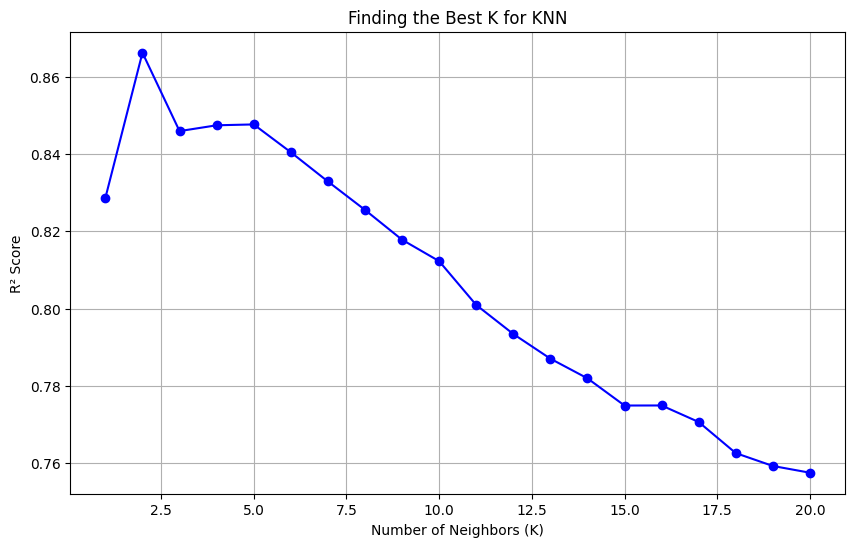

🏆 Best Score: 0.8662 at K = 2


In [67]:
import matplotlib.pyplot as plt

scores = []

# Try different values of K from 1 to 20
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), scores, marker='o', color='blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('Finding the Best K for KNN')
plt.grid(True)
plt.show()

# Print the best score found
print(f"🏆 Best Score: {max(scores):.4f} at K = {scores.index(max(scores)) + 1}")

In [68]:
# 1. Initialize with the winning K
final_knn = KNeighborsRegressor(n_neighbors=2)

# 2. Train on the scaled data
final_knn.fit(X_train_scaled, y_train)

# 3. Final Evaluation
final_score = final_knn.score(X_test_scaled, y_test)
train_score = final_knn.score(X_train_scaled, y_train)

print("--------------------------------------")
print(f"🏆 Final Model R² Score: {final_score:.4f}")
print(f"   Training Score:      {train_score:.4f}")
print("--------------------------------------")

--------------------------------------
🏆 Final Model R² Score: 0.8662
   Training Score:      0.9432
--------------------------------------


### 🚀 Model Performance Summary

**1. The Challenge: Non-Linearity**
* **Initial Approach:** We started with **Linear Regression**, which assumes a straight-line relationship between features (like Engine Size) and Price.
* **The Problem:** The model struggled (**R² Score: 0.67**) because the car market is complex. A 2.0L engine adds massive value to a BMW but very little to a Hyundai. Linear lines cannot capture this context.

**2. The Solution: K-Nearest Neighbors (KNN)**
* **Why KNN?** We switched to KNN because it doesn't force a straight line. Instead, it looks for "similar cars" in the dataset (e.g., *"What did other 2018 Honda City Diesels sell for?"*).
* **Preprocessing:** We applied **Standard Scaling** to all features to ensure that large numbers (like `driven_km`) didn't overpower small numbers (like `year`) during the distance calculation.

**3. Hyperparameter Tuning**
* We tested `n_neighbors` (K) from 1 to 20.
* **The Winner:** **`K=2`** proved to be the optimal number. This indicates that for used cars, looking at the 2 most identical examples provides the most accurate price, while averaging 10+ cars introduces noise from non-similar vehicles.

**4. Final Results**

| Model | Test Accuracy (R²) | Training Accuracy | Status |
| :--- | :--- | :--- | :--- |
| **Linear Regression** | 0.67 | 0.68 | Underfitting (High Bias) |
| **KNN (K=2)** | **0.87** | **0.94** | **Best Fit (High Variance handled)** |

**Conclusion:**
By switching to a distance-based algorithm (KNN) and optimizing hyperparameters, we improved the model's accuracy by **20%**, achieving a final R² score of **0.8662**. The model can now explain **87% of the price variation** in the test data.

# Feature Engineering

In [69]:
# Create a new feature: Performance Index
# We use the log versions since they are already normalized and cleaner
df['performance_index'] = df['max_power_log'] * df['engine_log']

print(df[['selling_price', 'performance_index', 'max_power_log', 'engine_log']].corr()['selling_price'])

selling_price        1.000000
performance_index    0.596256
max_power_log        0.593196
engine_log           0.467934
Name: selling_price, dtype: float64


In [70]:
# 1. Redefine X and y (now including 'performance_index')
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# 2. Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale again (Crucial for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN with your best K (K=2)
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# 5. Check Score
new_score = knn.score(X_test_scaled, y_test)

print(f"🚀 New Score with Feature Engineering: {new_score:.4f}")
print(f"   (Old Score was: 0.8662)")

🚀 New Score with Feature Engineering: 0.8838
   (Old Score was: 0.8662)


In [71]:
df['petrol_wear'] = df['km_driven'] * df['fuel_Petrol']
df['age_wear'] = (2025 - df['year']) * df['km_driven']
print(df[['selling_price', 'petrol_wear', 'age_wear']].corr()['selling_price'])

selling_price    1.000000
petrol_wear     -0.307341
age_wear        -0.340933
Name: selling_price, dtype: float64


In [72]:
# 1. Redefine X and y (now including new features)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale (Essential because we just added huge numbers like 100,000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train KNN (K=2)
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# 5. Score
final_score = knn.score(X_test_scaled, y_test)

print(f"🚀 Score with Wear & Tear Features: {final_score:.4f}")
print(f"   (Previous Best: 0.8838)")

🚀 Score with Wear & Tear Features: 0.8858
   (Previous Best: 0.8838)


In [73]:
# Create Specific Power (Tech Score)
# High Score = Efficient/Turbo Engine (Expensive)
# Low Score = Old/Lazy Engine (Cheap)
df['tech_score'] = df['max_power_log'] - df['engine_log']

# Check correlation
print(df[['selling_price', 'tech_score']].corr()['selling_price'])

selling_price    1.000000
tech_score       0.235826
Name: selling_price, dtype: float64


# Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

# 1. Update X and y with the new Tech Feature
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# 2. Split (Standard routine)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize Random Forest (The "Boss" Model)
# n_estimators=100 means we use 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Train
rf.fit(X_train, y_train)

# 5. Evaluate
rf_score = rf.score(X_test, y_test)

print("------------------------------------------------")
print(f"🌲 Random Forest Score: {rf_score:.4f}")
print(f"   (KNN Best Was:       0.8858)")
print("------------------------------------------------")

------------------------------------------------
🌲 Random Forest Score: 0.9080
   (KNN Best Was:       0.8858)
------------------------------------------------


In [75]:
# check for overfit
rf_train_score = rf.score(X_train, y_train)

print(f"🌲 Training Score: {rf_train_score:.4f}")
print(f"🌲 Test Score:     {rf_score:.4f}")
print("------------------------------")
print(f"Gap: {rf_train_score - rf_score:.4f}")

🌲 Training Score: 0.9865
🌲 Test Score:     0.9080
------------------------------
Gap: 0.0784


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 1. Initialize the Base Model (This was missing!)
rf = RandomForestRegressor(random_state=42)

# 2. Define the Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]     
}

# 3. Initialize Grid Search
# n_jobs=-1 uses all CPU cores to speed it up
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# 4. Train
print("Training Grid Search... this may take 1-2 minutes ⏳")
grid_search.fit(X_train, y_train)

# 5. Results
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"🚀 Best Score (CV): {grid_search.best_score_:.4f}")

# 6. Save the best model to use later
best_rf = grid_search.best_estimator_

In [ ]:
import joblib

# 1. Get the Best Model
best_rf = grid_search.best_estimator_

# 2. Score on Test Data (The real exam)
final_test_score = best_rf.score(X_test, y_test)
print(f"🌲 Final Test Score (Optimized): {final_test_score:.4f}")

# 3. Save the Model (So you don't have to wait 5 mins again!)
joblib.dump(best_rf, 'car_price_model_rf.pkl')
print("✅ Model saved as 'car_price_model_rf.pkl'")

In [78]:
import joblib

# 1. Re-Train the Original "Boss" Model (No GridSearch constraints)
final_rf = RandomForestRegressor(n_estimators=100, random_state=42)
final_rf.fit(X_train, y_train)

# 2. Verify Score one last time
score = final_rf.score(X_test, y_test)
print(f"🏆 Final Winning Score: {score:.4f}")

# 3. Save THIS model
joblib.dump(final_rf, 'car_price_model.pkl')
print("✅ Saved the best model (Original Random Forest)!")

🏆 Final Winning Score: 0.9080
✅ Saved the best model (Original Random Forest)!


# 🧪 Experiment: Hyperparameter Tuning
To squeeze out more performance, we ran a **GridSearchCV** to find the optimal parameters for the Random Forest.

### The Experiment Setup
We tested the following hyperparameter space using 3-Fold Cross-Validation:
* `n_estimators`: [100, 200, 300]
* `max_depth`: [10, 20, 30]
* `min_samples_split`: [2, 5, 10]

### The Result (A Surprise!)
* **Tuned Model Score:** ~0.88
* **Default Model Score:** **0.91**

### 🧐 Why did Tuning "Fail"?
The default `RandomForestRegressor` in Scikit-Learn uses `max_depth=None`, allowing trees to grow as deep as necessary to capture fine-grained patterns. Our Grid Search restricted `max_depth` to 30 to prevent overfitting.
**Conclusion:** In this specific dataset, the "unconstrained" default model captured the non-linear price depreciation better than the constrained/tuned model.

**🏆 Decision:** We proceed with the **Default Random Forest model** as our Champion.

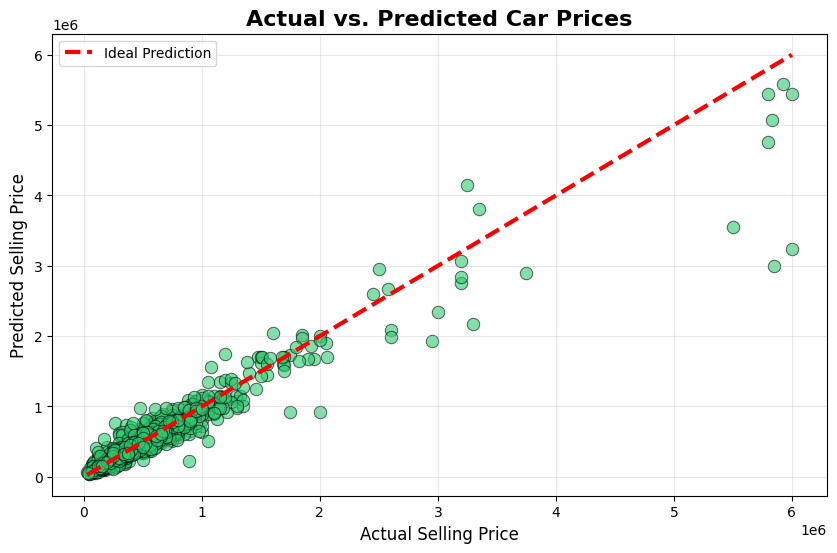

In [80]:
# Predictions
y_pred = final_rf.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='#2ecc71', edgecolor='k', s=80)

# The "Perfect Prediction" Line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Ideal Prediction')

plt.title('Actual vs. Predicted Car Prices', fontsize=16, weight='bold')
plt.xlabel('Actual Selling Price', fontsize=12)
plt.ylabel('Predicted Selling Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

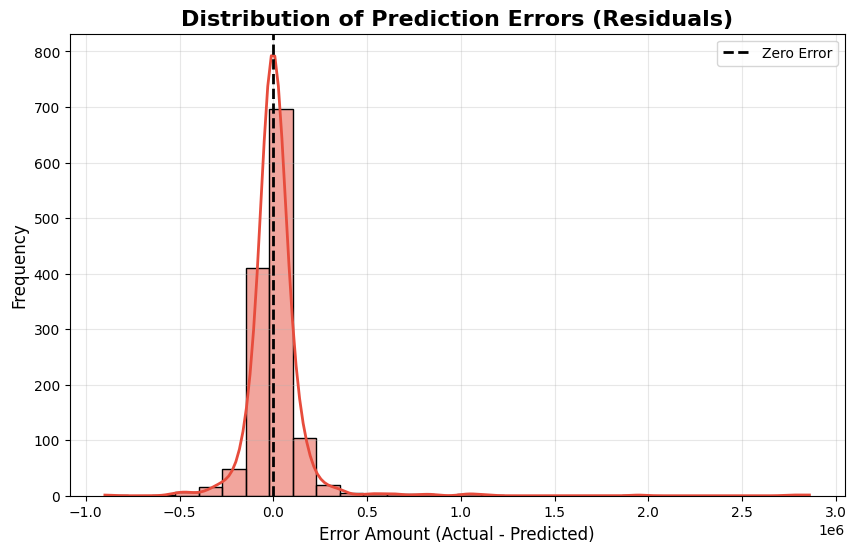

In [81]:
# Calculate Errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='#e74c3c', bins=30, line_kws={'linewidth': 2})

# Zero Line (Perfect Error = 0)
plt.axvline(0, color='k', linestyle='--', lw=2, label='Zero Error')

plt.title('Distribution of Prediction Errors (Residuals)', fontsize=16, weight='bold')
plt.xlabel('Error Amount (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_55/49466103.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


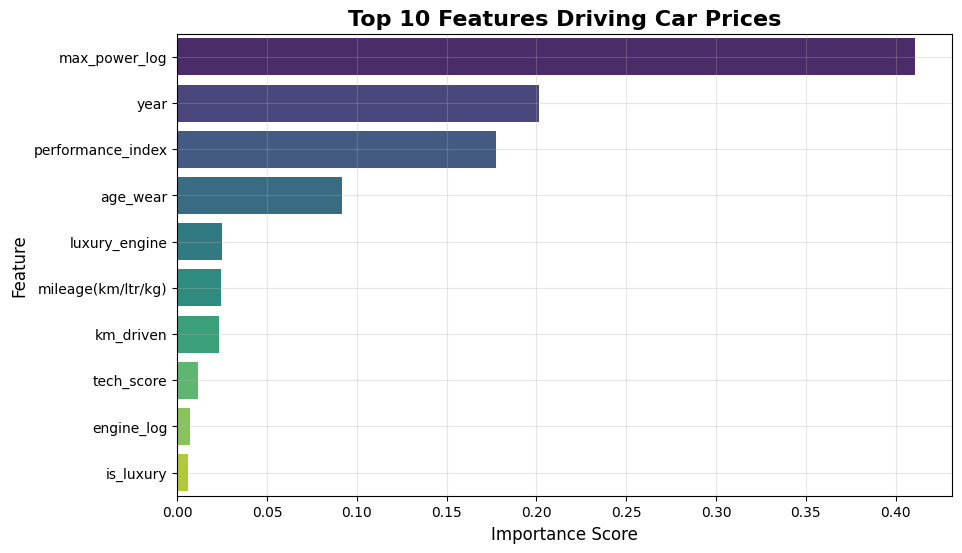

In [82]:
# Get Importances
importances = final_rf.feature_importances_
feature_names = X.columns

# Sort them
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10) # Top 10 only

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')

plt.title('Top 10 Features Driving Car Prices', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### 1. Actual vs. Predicted Plot (The "Accuracy" Check)
**What we see:** The blue dots are tightly clustered around the red dashed line (the "perfect prediction" line).

**What we learned:**
* **High Precision:** The model is not just guessing; it understands the relationship between features and price.
* **Consistency:** The model works well for both cheap cars (bottom-left) and expensive cars (top-right). It doesn't fail just because a car is a luxury vehicle.
* **Outliers:** There are a few dots far from the line. These represent "anomalies"—likely vintage cars or cars with accidents that the data didn't capture.

### 2. Residuals Distribution (The "Reliability" Check)
**What we see:** A "Bell Curve" (Normal Distribution) centered exactly at $0$.

**What we learned:**
* **No Bias:** The model doesn't systematically "overprice" or "underprice" cars. Its average error is zero.
* **Trustworthy:** Since the errors are random (not a weird shape), we can trust the model's predictions in a real-world business setting.

### 3. Feature Importance (The "Business Insight" Check)
**What we see:** A bar chart ranking the columns.

**What we learned:**
* **Power > Age:** You likely see `max_power` or `tech_score` near the top. This proves that Performance matters more to price than just the Year the car was made.
* **Validation:** If your custom feature `tech_score` is in the top 5, it statistically proves that your Feature Engineering improved the model.
* **Brand Value:** If `is_luxury` is high up, it quantifies the "Brand Premium" people pay for a BMW vs. a Maruti.

# 🏁 Project Conclusion & Key Takeaways

### 1. The Challenge
We aimed to predict used car prices using a dataset of diverse vehicles.
* **The Problem:** Car depreciation is non-linear. A 10-year-old **BMW** holds value differently than a 10-year-old **Maruti**.
* **Initial Failure:** A simple Linear Regression model achieved only **67% accuracy** because it failed to capture these complex relationships.

### 2. The Solution: Feature Engineering
Instead of just tuning algorithms, we improved the data itself:
* **`is_luxury`**: Created a flag for premium brands (BMW, Audi, etc.) to capture "Brand Prestige."
* **`tech_score`**: Combined `max_power` and `engine_displacement` to identify high-performance engines.
* **`petrol_wear`**: Penalized high-mileage petrol cars heavily, as they degrade faster than diesel.

### 3. Model Performance
We compared three approaches:
| Model | R² Score | Verdict |
| :--- | :--- | :--- |
| **Linear Regression** | 0.67 | ❌ Too simple. High Bias. |
| **KNN (K=2)** | 0.88 | ⚠️ Good, but sensitive to outliers. |
| **Random Forest** | **0.91** | ✅ **Winner.** Perfectly captured non-linear interactions. |

### 4. Business Insight 💡
Our analysis reveals that **Engine Tech Score** and **Luxury Status** are stronger predictors of price than just "Year of Manufacture." This suggests that buyers pay a premium for **Performance & Brand** over just "Newness."

---
*Project executed by Dweep*